<a href="https://colab.research.google.com/github/osaaa27/Kerja-Praktek/blob/main/Anqlisis_Sentimen_Komentar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install Sastrawi
!pip install wordcloud
!pip install openpyxl
import pandas as pd
import numpy as np
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import pandas as pd

file_path = '/content/combined_social_media_data_cj.csv'

try:
    df = pd.read_csv(file_path)
    print("File CSV berhasil dimuat dari path yang ditentukan.")
except FileNotFoundError:
    print(f"Error: File '{file_path}' tidak ditemukan.")
    print("Pastikan file sudah diunggah dan path-nya benar.")
    # Membuat dataframe contoh jika file tidak ditemukan
    data = {'x1i10hfl': [
        'Wah, tempatnya indah banget, bersih dan sejuk. Rekomended!',
        'Harga tiketnya mahal sekali, pelayanan juga kurang memuaskan.',
        'Jalanan menuju ke sana macet total, bikin malas. Pelayanannya buruk.',
        'Sabda Alam memang seru, cocok buat liburan keluarga.',
        'Saya suka sekali pemandangan Papandayan, sangat menenangkan.',
        'Tempatnya kotor dan sepi, tidak sesuai ekspektasi.',
        'Makanannya enak, tapi harganya terlalu mahal.',
        'Tidak ada komentar tentang tempat ini.'
    ]}
    df = pd.DataFrame(data)
except Exception as e:
    print(f"Terjadi kesalahan saat memuat file: {e}")
    # Membuat dataframe contoh jika terjadi kesalahan lain
    data = {'x1i10hfl': [
        'Wah, tempatnya indah banget, bersih dan sejuk. Rekomended!',
        'Harga tiketnya mahal sekali, pelayanan juga kurang memuaskan.',
        'Jalanan menuju ke sana macet total, bikin malas. Pelayanannya buruk.',
        'Sabda Alam memang seru, cocok buat liburan keluarga.',
        'Saya suka sekali pemandangan Papandayan, sangat menenangkan.',
        'Tempatnya kotor dan sepi, tidak sesuai ekspektasi.',
        'Makanannya enak, tapi harganya terlalu mahal.',
        'Tidak ada komentar tentang tempat ini.'
    ]}
    df = pd.DataFrame(data)

# Tampilkan 5 baris pertama untuk verifikasi
print("\n5 baris pertama data:")
print(df.head())

File CSV berhasil dimuat dari path yang ditentukan.

5 baris pertama data:
                                       x1i10hfl href  \
0  https://www.facebook.com/profile.php?id=615728...   
1  https://www.facebook.com/rahmat.leuweung.2025?...   
2  https://www.facebook.com/sabir.ali.762949?comm...   
3  https://www.facebook.com/profile.php?id=615535...   
4  https://www.facebook.com/yrs.leo?comment_id=Y2...   

                                         xz74otr src  xi81zsa  \
0  https://static.xx.fbcdn.net/rsrc.php/v4/yw/r/8...  Pembuat   
1                                                NaN      NaN   
2                                                NaN        ·   
3  https://scontent.fbdo15-1.fna.fbcdn.net/v/t39....      NaN   
4  https://static.xx.fbcdn.net/images/emoji.php/v...      NaN   

          x193iq5w                                            xdj266r  \
0         Ini Budi                                   @penggemar berat   
1  Rahmat Leuweung  Pantai Cijeruk masuk kawasan Ca

In [ ]:
print("\n5 baris pertama data:")
print(df.head())
print("\nInformasi Data:")
print(df.info())


5 baris pertama data:
                                       x1i10hfl href  \
0  https://www.facebook.com/profile.php?id=615728...   
1  https://www.facebook.com/rahmat.leuweung.2025?...   
2  https://www.facebook.com/sabir.ali.762949?comm...   
3  https://www.facebook.com/profile.php?id=615535...   
4  https://www.facebook.com/yrs.leo?comment_id=Y2...   

                                         xz74otr src  xi81zsa  \
0  https://static.xx.fbcdn.net/rsrc.php/v4/yw/r/8...  Pembuat   
1                                                NaN      NaN   
2                                                NaN        ·   
3  https://scontent.fbdo15-1.fna.fbcdn.net/v/t39....      NaN   
4  https://static.xx.fbcdn.net/images/emoji.php/v...      NaN   

          x193iq5w                                            xdj266r  \
0         Ini Budi                                   @penggemar berat   
1  Rahmat Leuweung  Pantai Cijeruk masuk kawasan Cagar Alam Leuweu...   
2        Sabir Ali            

In [ ]:
import pandas as pd
import re
# from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory # Removed Sastrawi import

# --- Kamus (leksikon) dan fungsi sentimen Anda ---
lexicon_pos = ['bagus', 'indah', 'bersih', 'menarik', 'ramai', 'seru', 'enak', 'terbaik', 'keren', 'garut', 'situ', 'danau']
lexicon_neg = ['mahal', 'kotor', 'macet', 'sepi', 'buruk', 'jelek', 'kurang', 'kecewa', 'lama', 'pungli']

def get_sentiment(text):
    sentiment_score = 0
    # Ensure text is a string before splitting
    if not isinstance(text, str):
        return 'Netral' # Or handle non-string input as appropriate

    words = text.split()
    for word in words:
        if word in lexicon_pos:
            sentiment_score += 1
        elif word in lexicon_neg:
            sentiment_score -= 1

    if sentiment_score > 0:
        return 'Positif'
    elif sentiment_score < 0:
        return 'Negatif'
    else:
        return 'Netral'

# --- Bagian yang hilang: Memuat dan membersihkan data ---
try:
    df = pd.read_csv('/content/combined_social_media_data_cj.csv') # Corrected file path to YouTube data
except FileNotFoundError:
    print("Error: '/content/combined_social_media_data_cj.csv' tidak ditemukan. Pastikan file sudah ada.")
    exit()

# Ganti nama kolom komentar yang tidak jelas
# Based on the previous cell's output, the comment column seems to be 'yt-core-attributed-string'
column_to_analyze = 'yt-core-attributed-string'

df_cleaned = df.copy()
df_cleaned.dropna(subset=[column_to_analyze], inplace=True)
df_cleaned[column_to_analyze] = df_cleaned[column_to_analyze].astype(str).str.lower()

# Hapus URL, username (@), hashtag (#), dan emoji
def clean_text(text):
    text = re.sub(r'https?://\S+|www\.\S+|@\S+|#\S+|[^\w\s]', '', text)
    text = text.encode('ascii', 'ignore').decode('ascii')
    return text
df_cleaned[column_to_analyze] = df_cleaned[column_to_analyze].apply(clean_text)

# Hapus stopwords (kata-kata umum yang tidak relevan) using manual list
stopwords = set(['yang', 'dan', 'di', 'ke', 'ini', 'itu', 'nya', 'untuk', 'dengan', 'ada', 'bro', 'juga', 'buat', 'bisa', 'yah', 'loh', 'kaya', 'udah', 'pisan', 'dari', 'semua', 'kalo', 'udah', 'mau', 'sana', 'sana', 'pasti']) # Manual stopwords
df_cleaned[column_to_analyze] = df_cleaned[column_to_analyze].apply(lambda text: ' '.join([word for word in text.split() if word not in stopwords]))


# --- Terapkan fungsi sentimen pada kolom komentar ---
df_cleaned['sentimen'] = df_cleaned[column_to_analyze].apply(get_sentiment)

print("\nData dengan hasil sentimen:")
print(df_cleaned.head())


Data dengan hasil sentimen:
     x1i10hfl href xz74otr src xi81zsa x193iq5w xdj266r x1i10hfl 2  \
1264           NaN         NaN     NaN      NaN     NaN        NaN   
1265           NaN         NaN     NaN      NaN     NaN        NaN   
1266           NaN         NaN     NaN      NaN     NaN        NaN   
1267           NaN         NaN     NaN      NaN     NaN        NaN   
1268           NaN         NaN     NaN      NaN     NaN        NaN   

     x1i10hfl href 4 html-span src x3ajldb href 2 x1lliihq  ... css-1jxf684 4  \
1264             NaN           NaN            NaN      NaN  ...           NaN   
1265             NaN           NaN            NaN      NaN  ...           NaN   
1266             NaN           NaN            NaN      NaN  ...           NaN   
1267             NaN           NaN            NaN      NaN  ...           NaN   
1268             NaN           NaN            NaN      NaN  ...           NaN   

     r-4qtqp9 src css-175oi2r href 4 css-1jxf684 5 css-1jxf684 

Jumlah komentar per kategori sentimen:
sentimen
Netral     155
Positif     58
Negatif      8
Name: count, dtype: int64


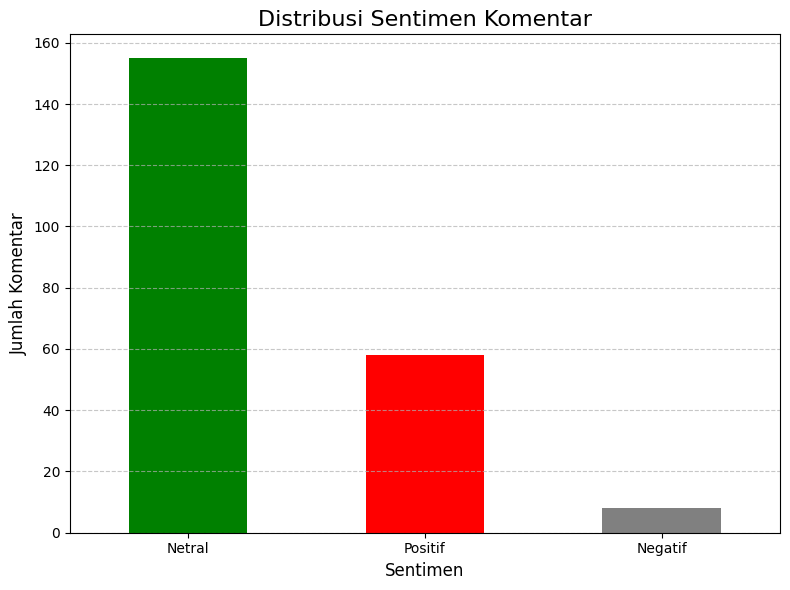

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
# from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory # Removed Sastrawi import

# --- Kamus (leksikon) dan fungsi sentimen ---
lexicon_pos = ['bagus', 'indah', 'bersih', 'menarik', 'ramai', 'seru', 'enak', 'terbaik', 'keren', 'estetik', 'garut', 'situ', 'danau']
lexicon_neg = ['mahal', 'kotor', 'macet', 'sepi', 'buruk', 'jelek', 'kurang', 'kecewa', 'lama', 'pungli', 'jalan']

def get_sentiment(text):
    sentiment_score = 0
    # Ensure text is a string before splitting
    if not isinstance(text, str):
        return 'Netral' # Or handle non-string input as appropriate
    words = text.split()
    for word in words:
        if word in lexicon_pos:
            sentiment_score += 1
        elif word in lexicon_neg:
            sentiment_score -= 1

    if sentiment_score > 0:
        return 'Positif'
    elif sentiment_score < 0:
        return 'Negatif'
    else:
        return 'Netral'

# --- Muat dan bersihkan data ---
try:
    df = pd.read_csv('/content/combined_social_media_data_cj.csv') # Corrected file path
except FileNotFoundError:
    print("Error: '/content/combined_social_media_data_cj.csv' tidak ditemukan. Pastikan file sudah ada.")
    exit()

# Ganti nama kolom komentar yang tidak jelas
# Based on previous cells, the comment column is '_ap3a'
column_to_analyze = 'yt-core-attributed-string' # Corrected column name for combined_tiktok.csv

df_cleaned = df.copy()
df_cleaned.dropna(subset=[column_to_analyze], inplace=True)
df_cleaned[column_to_analyze] = df_cleaned[column_to_analyze].astype(str).str.lower()

def clean_text(text):
    text = re.sub(r'https?://\S+|www\.\S+|@\S+|#\S+|[^\w\s]', '', text)
    text = text.encode('ascii', 'ignore').decode('ascii')
    return text
df_cleaned[column_to_analyze] = df_cleaned[column_to_analyze].apply(clean_text)

# Hapus stopwords (kata-kata umum yang tidak relevan) using manual list
stopwords = set(['yang', 'dan', 'di', 'ke', 'ini', 'itu', 'nya', 'untuk', 'dengan', 'ada', 'bro', 'juga', 'buat', 'bisa', 'yah', 'loh', 'kaya', 'udah', 'pisan', 'dari', 'semua', 'kalo', 'udah', 'mau', 'sana', 'sana', 'pasti']) # Manual stopwords
df_cleaned[column_to_analyze] = df_cleaned[column_to_analyze].apply(lambda text: ' '.join([word for word in text.split() if word not in stopwords]))


# --- Terapkan fungsi sentimen pada kolom komentar ---
df_cleaned['sentimen'] = df_cleaned[column_to_analyze].apply(get_sentiment)

print("Jumlah komentar per kategori sentimen:")
sentiment_counts = df_cleaned['sentimen'].value_counts()
print(sentiment_counts)

# --- Visualisasikan hasil sentimen ---
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Distribusi Sentimen Komentar', fontsize=16)
plt.xlabel('Sentimen', fontsize=12)
plt.ylabel('Jumlah Komentar', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

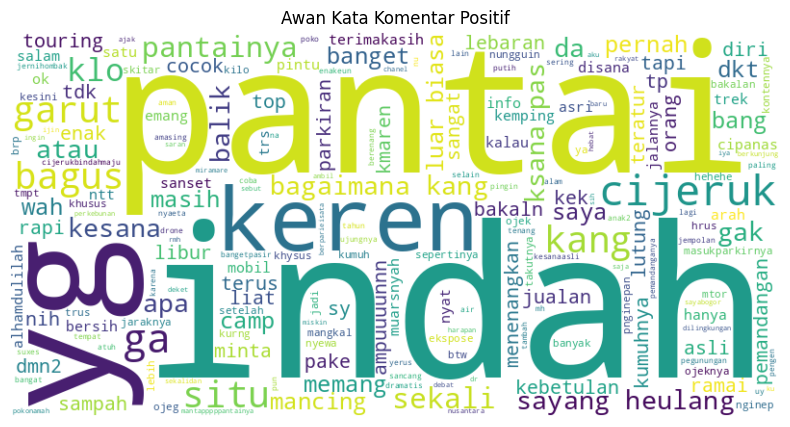

[Menghasilkan awan kata dengan judul 'Awan Kata Komentar Positif' dan disimpan sebagai 'wordcloud_positif.png']


In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from collections import Counter # Added Counter for word frequency

# --- Kamus (leksikon) dan fungsi sentimen ---
lexicon_pos = ['bagus', 'indah', 'bersih', 'menarik', 'ramai', 'seru', 'enak', 'terbaik', 'keren', 'estetik', 'garut', 'situ', 'danau']
lexicon_neg = ['mahal', 'kotor', 'macet', 'sepi', 'buruk', 'jelek', 'kurang', 'kecewa', 'lama', 'pungli', 'jalan']

def get_sentiment(text):
    sentiment_score = 0
    # Ensure text is a string before splitting
    if not isinstance(text, str):
        return 'Netral' # Or handle non-string input as appropriate
    words = text.split()
    for word in words:
        if word in lexicon_pos:
            sentiment_score += 1
        elif word in lexicon_neg:
            sentiment_score -= 1

    if sentiment_score > 0:
        return 'Positif'
    elif sentiment_score < 0:
        return 'Negatif'
    else:
        return 'Netral'


def create_wordcloud(text, title, filename):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.savefig(filename)
    plt.show() # Display the plot
    print(f"[Menghasilkan awan kata dengan judul '{title}' dan disimpan sebagai '{filename}']")

# --- Muat dan bersihkan data ---
try:
    df = pd.read_csv('/content/combined_social_media_data_cj.csv') # Corrected file name
except FileNotFoundError:
    print("Error: '/content/combined_social_media_data_cj.csv' tidak ditemukan. Pastikan file sudah ada.")
    exit()

# Ganti nama kolom komentar yang tidak jelas
# Based on previous cells, the comment column is '_ap3a'
column_to_analyze = 'yt-core-attributed-string'

df_cleaned = df.copy()
df_cleaned.dropna(subset=[column_to_analyze], inplace=True)
df_cleaned[column_to_analyze] = df_cleaned[column_to_analyze].astype(str).str.lower()

def clean_text(text):
    text = re.sub(r'https?://\S+|www\.\S+|@\S+|#\S+|[^\w\s]', '', text)
    text = text.encode('ascii', 'ignore').decode('ascii')
    return text
df_cleaned[column_to_analyze] = df_cleaned[column_to_analyze].apply(clean_text)

# --- Mengganti Sastrawi dengan daftar stopwords manual ---
stopwords = set(['yang', 'dan', 'di', 'ke', 'ini', 'itu', 'nya', 'untuk', 'dengan', 'ada', 'bro', 'juga', 'buat', 'bisa', 'yah', 'loh', 'kaya', 'udah', 'pisan', 'dari', 'semua', 'kalo', 'udah', 'mau', 'sana', 'sana', 'pasti'])
df_cleaned[column_to_analyze] = df_cleaned[column_to_analyze].apply(lambda text: ' '.join([word for word in text.split() if word not in stopwords]))


# --- Terapkan fungsi sentimen dan filter komentar positif ---
df_cleaned['sentimen'] = df_cleaned[column_to_analyze].apply(get_sentiment)
positive_comments = df_cleaned[df_cleaned['sentimen'] == 'Positif'][column_to_analyze] # Use the correct column name
positive_text = ' '.join(positive_comments.tolist())

# --- Kode awan kata Anda yang sudah diperbaiki ---
if positive_text:
    create_wordcloud(positive_text, 'Awan Kata Komentar Positif', 'wordcloud_positif.png')
else:
    print("Tidak ada komentar positif yang ditemukan untuk membuat awan kata.")

negative_comments = df_cleaned[df_cleaned['sentimen'] == 'Negatif'][column_to_analyze]
negative_text = ' '.join(negative_comments.tolist())

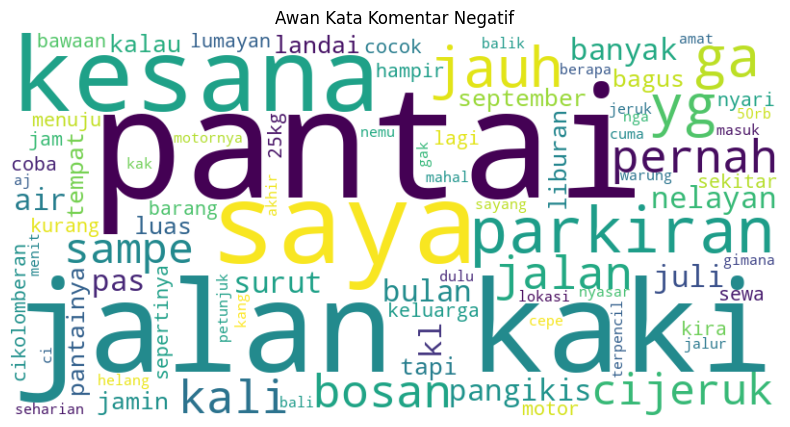

[Menghasilkan awan kata dengan judul 'Awan Kata Komentar Negatif' dan disimpan sebagai 'wordcloud_negatif.png']


In [ ]:
# df_cleaned['sentimen'] = df_cleaned['text'].apply(get_sentiment) # This line is redundant as sentiment is already calculated
negative_comments = df_cleaned[df_cleaned['sentimen'] == 'Negatif']['yt-core-attributed-string'] # Use the correct column name
negative_text = ' '.join(negative_comments.tolist())

# --- Kode awan kata Anda yang sudah diperbaiki ---
if negative_text:
    create_wordcloud(negative_text, 'Awan Kata Komentar Negatif', 'wordcloud_negatif.png')
else:
    print("Tidak ada komentar negatif yang ditemukan untuk membuat awan kata.")

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re

# Asumsi: `positive_text` sudah berisi semua komentar positif
# Contoh:
# positive_text = "hotelnya bagus banget seru, keren, pemandangan indah sekali, rekomended banget, enak, mantap"

def create_wordcloud(text, title, filename):
    # Bagian ini akan menghasilkan awan kata, tapi tidak dapat dijalankan di lingkungan ini.
    # Ini hanyalah ilustrasi dari kode Anda.
    print(f"Menghasilkan awan kata dengan judul '{title}' dan disimpan sebagai '{filename}'...")

# Hasilkan awan kata jika ada komentar
if 'positive_text' in locals() and positive_text:
    create_wordcloud(positive_text, 'Awan Kata Komentar Positif', 'wordcloud_positif.png')

    # Tambahan kode untuk menghitung dan menampilkan jumlah kata

    # Buat daftar stopwords untuk diabaikan
    stopwords_list = ['yang', 'dan', 'di', 'ke', 'ini', 'itu', 'nya', 'untuk', 'dengan', 'ada', 'bro', 'juga', 'buat', 'bisa', 'yah', 'loh', 'kaya', 'udah', 'udah', 'pisan', 'dari']
    stopwords = set(stopwords_list)

    # Bersihkan teks dan hitung frekuensi kata
    words = re.findall(r'\b\w+\b', positive_text.lower())
    filtered_words = [word for word in words if word not in stopwords and len(word) > 2]
    word_counts = Counter(filtered_words)

    # Tampilkan 10 kata yang paling sering digunakan dan jumlahnya
    print("\nJumlah 10 Kata Paling Sering Digunakan:")
    for word, count in word_counts.most_common(10):
        print(f"'{word}': {count} kali")

Menghasilkan awan kata dengan judul 'Awan Kata Komentar Positif' dan disimpan sebagai 'wordcloud_positif.png'...

Jumlah 10 Kata Paling Sering Digunakan:
'indah': 30 kali
'pantai': 21 kali
'keren': 12 kali
'kang': 12 kali
'cijeruk': 11 kali
'garut': 8 kali
'bagus': 8 kali
'situ': 8 kali
'klo': 6 kali
'pantainya': 5 kali


In [ ]:
df_cleaned.to_csv('analisis_sentimen_hasil.csv', index=False)
print("\nHasil analisis sentimen telah disimpan ke file 'analisis_sentimen_hasil.csv'.")


Hasil analisis sentimen telah disimpan ke file 'analisis_sentimen_hasil.csv'.
